Primer on Independent Component Analysis
========================================

ICA finds directions in the feature space corresponding to projections with high non-Gaussianity.

- not necessarily orthogonal in the original feature space, but orthogonal in the whitened feature space.
- In contrast, PCA finds orthogonal directions in the raw feature
space that correspond to directions accounting for maximum variance.
- or differently, if data only reflect Gaussian processes ICA and PCA are equivalent.


**Example**: Imagine 3 instruments playing simultaneously and 3 microphones
recording mixed signals. ICA can be used to recover the sources ie. what is played by each instrument. 

ICA employs a very simple model: $X = AS$ where $X$ is our observations, $A$ is the mixing matrix and $S$ is the vector of independent (latent) sources.

The challenge is to recover A and S from X.

## First generate simulated data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

np.random.seed(0)  # set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: sawtooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

## Now try to recover the sources

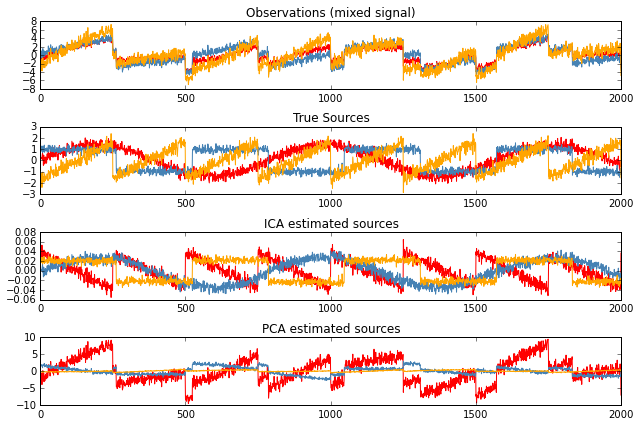

In [2]:
# compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # estimate PCA sources

plt.figure(figsize=(9, 6))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources', 
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [3]:
print 'I love you' * 100

I love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love youI love you

$\rightarrow$ PCA fails
at recovering our "instruments" since the related signals reflect
non-Gaussian processes.

Why is this relevant?
=====================

Many M/EEG signals including biological artifacts reflect non-Gaussian processes. 
Therefore PCA based artifact rejection will perform worse at separating signal and noise


MNE-Python ICA: concepts
========================

<img src="files/images/mne-ica-scheme.png" width="600">

- `decomposition` --> the estimation, the fit
- `unmixing matrix`: $A$ from the ICA model
- `components`: the columns of the ICA unmixing matrix
- `unmixing matrix`: $A$ from the ICA model
- `sources`: reconstructed latent time series
- `picking sources` --> zeroing out undesired components when (re-)mixing reconstructed sources to produce clean M/EEG signals 
- `unmixing matrix`: The pseudo-inverse of $A$ that is $A^{-1}$


MNE-Python ICA: Implementation and API
======================================

- Based scikit-learn implementations of PCA and Fast ICA that we optimized to perform well with M/EEG data
- fast randomized PCA algorithm
- memory profiled
- Domain specific interface (API) and convenience functions added
    - automated artifact detection
    - support estimation on multiple sensor types by pre-whitening / rescaling
    - visualization in one line of code
    - persistence
    - integration with MNE-Python object system
    - specific APIs for epochs VS raw data.